In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

print("setup complete")

setup complete


In [2]:
from sklearn.datasets import load_digits

In [5]:
dg=load_digits()
dir(dg)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [9]:
dg.images[1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [11]:
dg.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

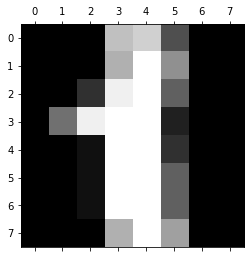

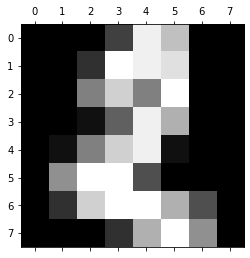

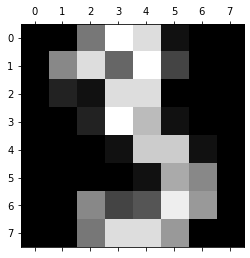

In [20]:
plt.gray()
for i in range(1,4):
    plt.matshow(dg.images[i])

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
dg.target

array([0, 1, 2, ..., 8, 9, 8])

In [23]:
xtrain,xtest, ytrain,ytest= train_test_split(dg.data, dg.target, test_size=0.3)

In [28]:
print(xtrain.shape)
print(ytrain.shape)

(1257, 64)
(1257,)


In [29]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain, ytrain)




c:\users\geonwoo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
model.score(xtest, ytest)

0.9444444444444444

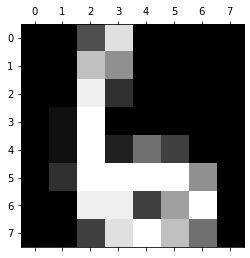

In [31]:
plt.matshow(dg.images[67])

In [33]:
model.predict([dg.data[67]])

array([6])

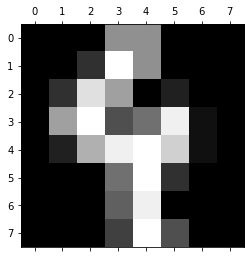

In [34]:
plt.matshow(dg.images[68])

In [35]:
dg.target[68]

4

In [36]:
model.predict([dg.data[68]])

array([4])

In [37]:
model.predict(dg.data[0:5])

array([0, 1, 2, 3, 4])

In [38]:
dg.target[0]

0

In [39]:
from sklearn.metrics import confusion_matrix

ypre=model.predict(xtest)
cm = confusion_matrix(ytest, ypre)
cm

array([[56,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 49,  0,  0,  2,  0,  0,  0,  1,  0],
       [ 0,  0, 53,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 52,  0,  2,  0,  0,  1,  2],
       [ 0,  0,  0,  0, 49,  0,  7,  1,  0,  0],
       [ 0,  1,  0,  1,  0, 46,  1,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 52,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 55,  0,  0],
       [ 0,  2,  0,  1,  0,  2,  0,  1, 45,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  2, 53]], dtype=int64)

Text(69.0, 0.5, 'True')

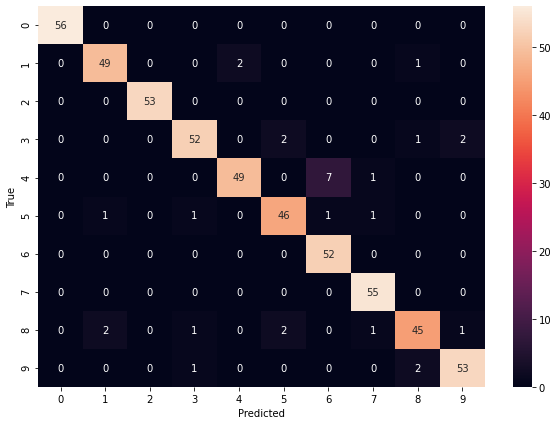

In [44]:
import seaborn as sn
plt.figure(figsize =( 10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")

**Multiclass Regression from Scratch**

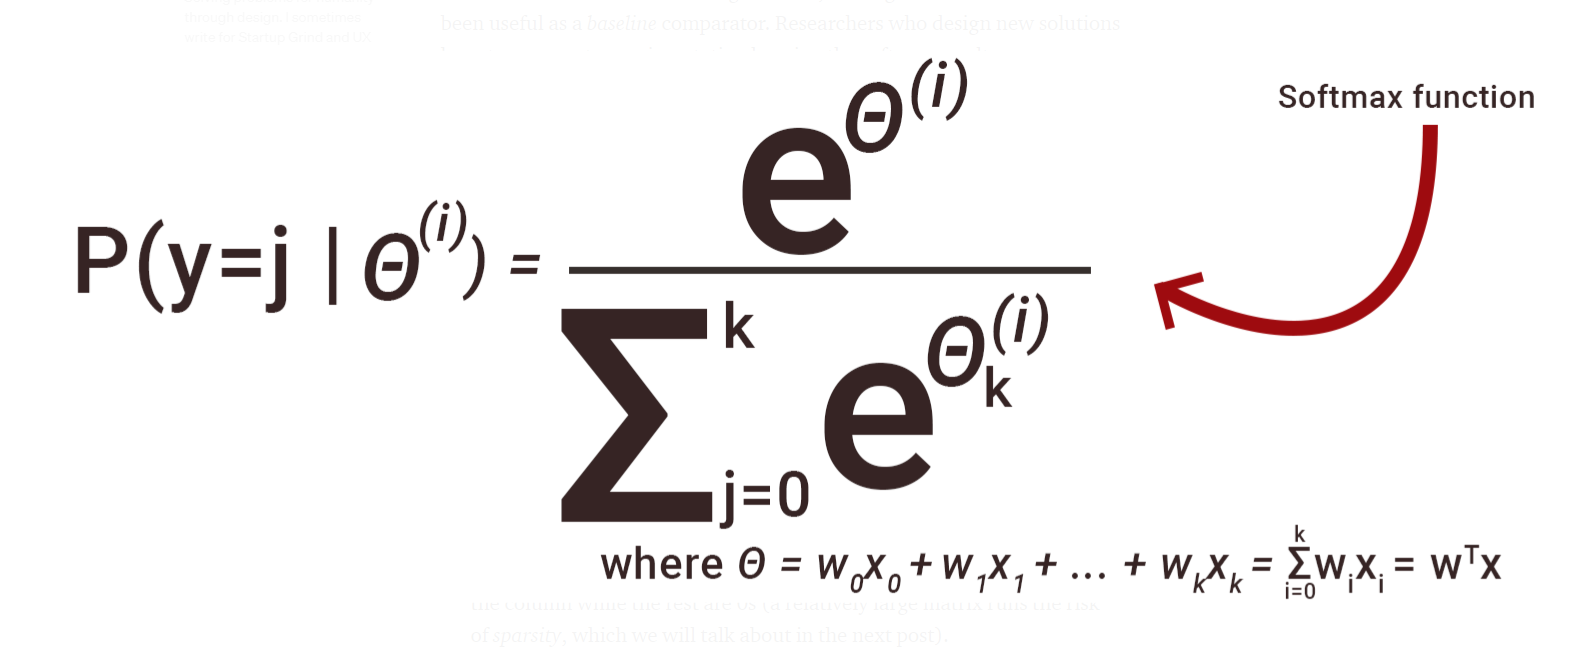

In [108]:
from sklearn.preprocessing import OneHotEncoder
from scipy.special import softmax
onehot_encoder = OneHotEncoder(sparse=False)
from sklearn.datasets import load_iris

#we have to make y onehot coded in order to serve the purpose 


def softmax_numpy(scores):return np.exp(scores)/sum(np.exp(scores), axis=0)

def loss(X, Y, W):

    Z = - X @ W
    N = X.shape[0]
    loss = 1/N * (np.trace(X @ W @ Y.T) + np.sum(np.log(np.sum(np.exp(Z), axis=1))))
    return loss

def gradient(X, Y, W, mu):

    Z = - X @ W
    P = softmax(Z, axis=1)
    N = X.shape[0]
    gd = 1/N * (X.T @ (Y - P)) + 2 * mu * W
    return gd

def gradient_descent(X, Y, max_iter=1000, eta=0.1, mu=0.01):
    #to avoid complexity we abandon bias. 
    #Although we could easily make db by making np.sum(y-yhat) when yhat is with softmax(-X@W)=scalar value 
    Y_onehot = onehot_encoder.fit_transform(Y.reshape(-1,1))
    W = np.zeros((X.shape[1], Y_onehot.shape[1]))
    step = 0
    step_lst = [] 
    loss_lst = []
    W_lst = []
 
    while step < max_iter:
        step += 1
        W -= eta * gradient(X, Y_onehot, W, mu) ##updating partial dw
        step_lst.append(step)
        W_lst.append(W)
        loss_lst.append(loss(X, Y_onehot, W))

    df = pd.DataFrame({
        'step': step_lst, 
        'loss': loss_lst
    })
    return df, W

class Multiclass:
    def fit(self, X, Y):
        self.loss_steps, self.W = gradient_descent(X, Y)

    def loss_plot(self):
        return self.loss_steps.plot(
            x='step', 
            y='loss',
            xlabel='step',
            ylabel='loss'
        )

    def predict(self, H):
        Z = - H @ self.W
        P = softmax(Z, axis=1)
        return np.argmax(P, axis=1)
    
    def accurate(self,ytrue,xtest):
        ycheck=ytrue.reshape(-1)
        scores=np.sum(ycheck==self.predict(xtest))/len(ytrue)
        return scores

In [109]:
X = load_iris().data
Y = load_iris().target
model = Multiclass()

In [110]:
xtrain,xtest, ytrain,ytest= train_test_split(X, Y, test_size=0.3)

In [111]:
model.fit(xtrain, ytrain)

In [112]:
xtest[0]

array([5.5, 3.5, 1.3, 0.2])

In [113]:
model.predict(xtest)

array([0, 0, 1, 2, 2, 1, 0, 2, 0, 1, 0, 0, 0, 0, 1, 2, 1, 2, 2, 0, 0, 2,
       0, 2, 0, 2, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 1, 1, 2,
       2], dtype=int64)

In [118]:
value=model.accurate(ytest,xtest)
print("accuracy is {}%".format(value*100))

accuracy is 91.11111111111111%


In [106]:
ytest.shape
c=ytest.reshape(-1)
c

array([0, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 0, 0, 0, 0, 2, 1, 2, 2, 2, 0, 2,
       1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 2, 2, 0, 2, 0,
       1])

<AxesSubplot:xlabel='step', ylabel='loss'>

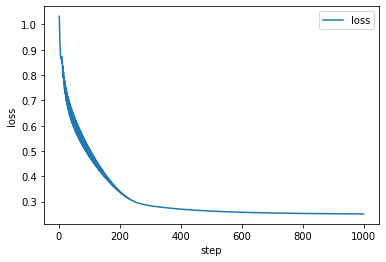

In [69]:
model.loss_plot()

**Using digit dataset available and compare with library generated accuracy**

In [119]:
xtrain,xtest, ytrain,ytest= train_test_split(dg.data, dg.target, test_size=0.3)

In [120]:
model=Multiclass()
model.fit(xtrain, ytrain)

In [121]:
value=model.accurate(ytest,xtest)
print("accuracy is {}%".format(value*100))

accuracy is 95.18518518518519%


In [122]:
xtrain

array([[ 0.,  0.,  0., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0.,  3., ...,  5.,  0.,  0.],
       ...,
       [ 0.,  0.,  9., ..., 13.,  3.,  0.],
       [ 0.,  1., 14., ...,  4.,  0.,  0.],
       [ 0.,  0.,  6., ...,  8.,  0.,  0.]])

Text(69.0, 0.5, 'True')

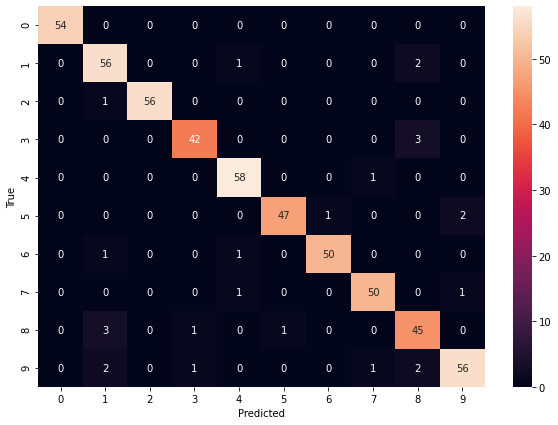

In [123]:
ypre=model.predict(xtest)
cm = confusion_matrix(ytest, ypre)
cm
plt.figure(figsize =( 10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")